In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [3]:
# Received help from Jasleen
df = pd.read_csv("data/DBData.csv")
df = df.drop(["Indicator Code", "Country Code", "Unnamed: 20"], axis = 1)
df = df.pivot_table(index = "Indicator Name",columns = "Country Name").T.reset_index(drop=False)
df = df.rename(columns = {"level_0": "Year"}).reset_index(drop=False)
df = df.rename(columns = {"index": "Measure"})
df.head()
# can't get rid of Indicator Name

Indicator Name,Measure,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2004,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2004,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [10]:
ff = pd.read_csv("data/GDPpc.csv")
ff = ff.drop(["Country Code", "Indicator Code"], axis = 1)
ff = ff.pivot_table(index = "Indicator Name",columns = "Country Name").T.reset_index()
ff = ff.rename(columns = {"level_0": "Year"})
ff.head()

Indicator Name,Year,Country Name,GDP per capita (current US$)
0,1960,Afghanistan,59.777327
1,1960,Algeria,244.824806
2,1960,Australia,1807.349784
3,1960,Austria,935.460427
4,1960,"Bahamas, The",1550.324315


In [30]:
# Received help from Jasleen for merge
sf = pd.merge(ff, df, on = ["Country Name", "Year"])
corr = sf.corrwith(sf["GDP per capita (current US$)"])
top3 = corr.sort_values(ascending=False)[1:4]
# the top 3 most correlated to GDP
top3

Indicator Name
Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)    0.646972
Resolving insolvency (DB04-14 methodology) - Score                                                              0.644669
Resolving insolvency: Recovery rate (cents on the dollar)                                                       0.644232
dtype: float64

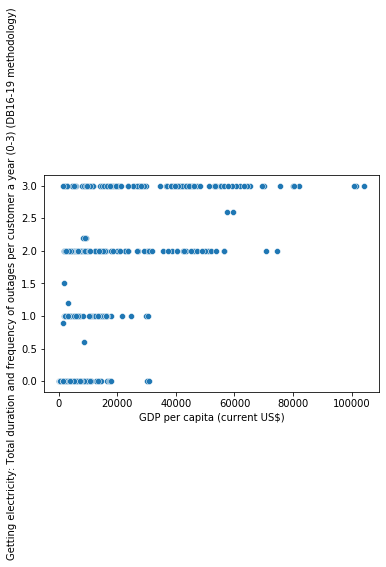

In [36]:
sns.scatterplot(data=sf, x = "GDP per capita (current US$)", y = "Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)");
# It seems that power outages have a mild correlation to GDP based on their frequency. One could assume that less money spent
# on generating power is money saved for the country.

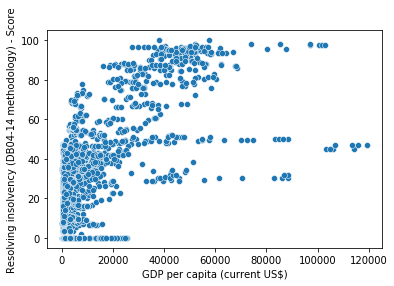

In [37]:
sns.scatterplot(data=sf, x = "GDP per capita (current US$)", y = "Resolving insolvency (DB04-14 methodology) - Score");
# Resolving insolvancy has a mild correlation to GDP as well. It makes sense on paper, the more people who are able to pay their
# debts and be part of the economy, the more money the country can make.

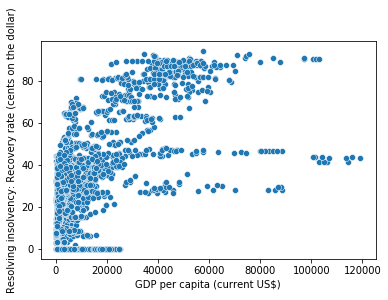

In [38]:
sns.scatterplot(data=sf, x = "GDP per capita (current US$)", y = "Resolving insolvency: Recovery rate (cents on the dollar)");
# Similar to resolving insolvency above. The recovery rate and resolving insolvency above have near identical correlations to
# GDP, very likely for the same reasons

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

Oh jeez where do I even start... There is so much wrong with this paper.

To start, the data he used in his paper is all wrong. The starting data (number of laureates) was downloaded from **Wikipedia**. Then he usedd data from 2 different websites, that were not formatted correctly because so many countries have data starting at different years. To top it off those websites no longer work, so the data is not verifiable by future studies because these were not reputable sources of data. 

Next up, the hypothesis! He did not expressedly state a hypothesis or null hypothesis at the start of the paper (standard practice). He instead infered three hypotheses at the end based on his incredibly faulty findings. He also claimed that this was a correlation but heavily implied a direct relation between chocolate consumption and production of laureates, implying even further that chocolate increases cognitive function without conducting **any** kind of test on cognitive function. The paper started off wanting to test if dietary flavonoids could "[...]improive cognitive function. Specifically, a reduction in the risk of dementia [...]" and ended on the note of "more consumption of chocolate per capita produces more laureates". This paper was all over the place... 

Lastly, the overall quality of the paper. This paper is, to put it mildly, shit. I'm a big believer in the scientific method and this paper made me angry at the overall incompetence. I mentioned above about not directly stating a hypothesis/null hypothesis. The paper also uses the first person "I" to make statements, which should never be used because the scientific method is impersonal and impartial; pure statistical analysis and testing to achieve a result. **It is not a matter of opinion but of facts**. The data is all wrong, the conclusions are all wrong. But most importantly, the whole thing is just scientific drivel! It just has a lot of big fancy pants science words thrown in to make it sound smart but it uses 0 standard procedures of the scientific method, it only mimics it. This is the epitome "pop science". Scientific **seeming and sounding** papers and studies but are complete nonsense. It is clickbait under the guise of academic research. These are the kind of papers that are reported about constantly on the news: superficial with useless results that make claims based on "research". 